# Import libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

# Get Min-Upper bounds

In [2]:
MIN_AVG = np.array([79,0,179], np.uint8)
MAX_AVG = np.array([128,255,255], np.uint8)

In [3]:
def order_points(points):
    # Convert the input points to a NumPy array
    points = np.array(points)

    # Initialize an array to store the ordered points
    ordered_points = np.zeros_like(points)

    # Calculate the centroid of the points
    centroid = np.mean(points, axis=0)

    # Calculate the angles between the centroid and each point
    angles = np.arctan2(points[:, 1] - centroid[1], points[:, 0] - centroid[0])

    # Sort the points based on angles
    ordered_indices = np.argsort(angles)
    ordered_points = points[ordered_indices]

    return ordered_points

In [4]:
# Read the image
image = cv2.imread('dataset/IMG_20231028_165823.jpg')
# image = cv2.imread('dataset/IMG_20231028_170040.jpg')
# image = cv2.imread('dataset/IMG_20231028_170944.jpg')
# image = cv2.imread('dataset/IMG_20231029_112300.jpg')
# image = cv2.imread('dataset/IMG_20231029_112430.jpg')
# image = cv2.imread("dataset/IMG_20231028_165859.jpg")

blur = cv2.GaussianBlur(image, (15, 15), 0)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

frame_threshed = cv2.inRange(hsv, MIN_AVG, MAX_AVG)

# t = cv2.GaussianBlur(frame_threshed, (21,21), 5)
contours, hierarchy = cv2.findContours(
    cv2.GaussianBlur(frame_threshed, (21,21), 5), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

image_tmp = image.copy()
approx1 = None

for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    epsilon = 0.02 * perimeter
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    # area_approx = cv2.contourArea(approx)

    if area > image_tmp.shape[0] * image_tmp.shape[1] / 3:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.intp(box)

        if len(approx) == 4:
            approx1 = approx
            cv2.drawContours(image_tmp, [box], 0, (0, 255, 0), 10)
            # Red box (approximated, the best one)
            selected_contours = cv2.drawContours(image_tmp, [approx], -1, (0, 0, 255), 10)

red_box_min_side = (np.abs(approx1[:, 0, 0] - approx1[:, 0, 1])).min()

# Order the points
approx2_ordered = order_points(
    np.array(approx1, dtype=np.float32).reshape(-1, 2)
).reshape(-1, 1, 2)

target_points_ordered = order_points(
    np.array(
        [
            [red_box_min_side, red_box_min_side],
            [0, red_box_min_side],
            [red_box_min_side, 0],
            [0, 0],
        ],
        dtype=np.float32,
    )
).reshape(-1, 1, 2)

# Calculate the perspective transformation matrix
perspective_matrix = cv2.getPerspectiveTransform(approx2_ordered, target_points_ordered)

# Apply the perspective transformation
dst = cv2.warpPerspective(
    image, perspective_matrix, (red_box_min_side, red_box_min_side)
)

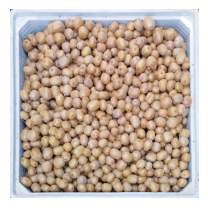

In [5]:
dpi = 300
plt.gcf().set_size_inches((dst.shape[0]/dpi, dst.shape[1]/dpi))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.savefig('tmp.png', bbox_inches='tight', pad_inches=0, dpi=dpi)
plt.show()

# Try fruit detection
- detect fruits
- split them between positions:
  - top view
  - side view
  - mixed
- try to estimate the size/shape/caliber
- try to estimate total production/bin.

- improve code performances (talking about CV)
- improve excecution time
- do the report
- code cleaning

- presentation